In [1]:
#IMporting libraries 
import numpy as np
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
datadir = keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = ".", untar = True)

228818944/228813984 [==============================] - 3s 0us/step


In [3]:
datadir

'./datasets/flower_photos'

In [4]:
!ls datasets

flower_photos  flower_photos.tar.gz


In [5]:
!pwd

/content


In [6]:
import pathlib
data_dir = pathlib.Path(datadir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/4933230547_394f618009_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4755705724_976621a1e7.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/23645265812_24352ff6bf.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5339004958_a0a6f385fd_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20871601265_daa4be4291_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6606823367_e89dc52a95_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4895721242_89014e723c_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21821266773_7113d34c35_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14678298676_6db8831ee6_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15108515192_f686dce398_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9339697826_88c9c4dc50.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/253586685_ee5b5f5232.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054864058_2edca122a9_n.jpg'),
 P

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3264570182_c7ded528ba_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/3921794817_276eb4386b.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg')]

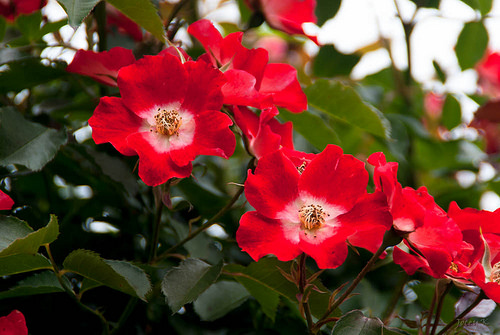

In [10]:
# Plotting an example of rose
PIL.Image.open(str(roses[1]))

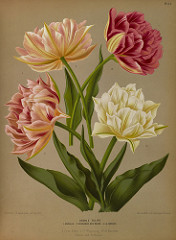

In [11]:
# Plotting an example tulips
tulips  = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [12]:
# Creating a dictionary 
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_images_dict.keys()

dict_keys(['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'])

In [14]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/3264570182_c7ded528ba_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/3921794817_276eb4386b.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12562723334_a2e0a9e3c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5717319579_190e85c7d1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16051111039_0f0626a241_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1485142251_ca89254442.jpg'),
 PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/12338444334_72fcc2fc58_m.jpg')

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers':3,
    'tulips': 4,
}

In [16]:
# Reading an image 
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [18]:
# Preparing dataset 
X, Y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img, (180,180))
    X.append(resized_image)
    Y.append(flowers_labels_dict[flower_name])
 

In [19]:
X[:1]

[array([[[228, 204, 199],
         [226, 205, 200],
         [228, 208, 203],
         ...,
         [252, 252, 252],
         [251, 251, 251],
         [252, 252, 252]],
 
        [[237, 217, 213],
         [234, 215, 211],
         [234, 216, 212],
         ...,
         [252, 252, 252],
         [251, 251, 251],
         [251, 251, 251]],
 
        [[241, 225, 223],
         [238, 223, 221],
         [236, 221, 219],
         ...,
         [251, 251, 251],
         [250, 250, 250],
         [250, 250, 250]],
 
        ...,
 
        [[218, 181, 173],
         [216, 179, 171],
         [215, 178, 170],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[220, 184, 176],
         [219, 183, 175],
         [218, 182, 174],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[222, 186, 179],
         [221, 185, 177],
         [220, 184, 177],
         ...,
         [255, 255, 255],
  

In [20]:
Y[:5]

[0, 0, 0, 0, 0]

In [21]:
# Converting X and Y into numpy arrays
X = np.array(X)
Y = np.array(Y)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

In [23]:
len(X_train), len(X_test)

(2752, 918)

In [24]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [25]:
X_train_scaled[0]

array([[[0.03921569, 0.12941176, 0.19607843],
        [0.03921569, 0.12941176, 0.22745098],
        [0.05098039, 0.14117647, 0.23529412],
        ...,
        [0.00392157, 0.09411765, 0.16078431],
        [0.01176471, 0.09019608, 0.17254902],
        [0.01176471, 0.08627451, 0.16470588]],

       [[0.03921569, 0.1254902 , 0.21960784],
        [0.03529412, 0.12941176, 0.21568627],
        [0.04705882, 0.1372549 , 0.23529412],
        ...,
        [0.01176471, 0.08627451, 0.17647059],
        [0.01176471, 0.08627451, 0.16078431],
        [0.01960784, 0.08627451, 0.16078431]],

       [[0.04313725, 0.12941176, 0.22352941],
        [0.03529412, 0.1372549 , 0.2       ],
        [0.05098039, 0.14509804, 0.23137255],
        ...,
        [0.01568627, 0.08627451, 0.17647059],
        [0.01960784, 0.09411765, 0.15686275],
        [0.02352941, 0.09411765, 0.16078431]],

       ...,

       [[0.04705882, 0.09411765, 0.13333333],
        [0.03529412, 0.09411765, 0.12941176],
        [0.02745098, 0

In [26]:
# Creating a DNN model
model = Sequential([
                    layers.Conv2D(16,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(len(flowers_labels_dict.keys()),activation='softmax')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 77s 883ms/step - loss: 1.6614 - accuracy: 0.3402
Epoch 2/5
86/86 [==============================] - 75s 877ms/step - loss: 1.0278 - accuracy: 0.6018
Epoch 3/5
86/86 [==============================] - 75s 877ms/step - loss: 0.8554 - accuracy: 0.6846
Epoch 4/5
86/86 [==============================] - 76s 879ms/step - loss: 0.5863 - accuracy: 0.7890
Epoch 5/5
86/86 [==============================] - 76s 886ms/step - loss: 0.3962 - accuracy: 0.8555


In [27]:
# Evaluating the test set 
model.evaluate(X_test_scaled,np.array(Y_test))

29/29 [==============================] - 8s 268ms/step - loss: 1.1627 - accuracy: 0.6296


[1.1627224683761597, 0.6296296119689941]

We have attained an accuracy score of 64%, (Not Bad)

In [28]:
Y_test = np.array(Y_test)
Y_pred = model.predict(X_test)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [29]:
Y_pred_labels[:5]

[1, 0, 1, 4, 2]

In [30]:
from sklearn.metrics import classification_report

print(classification_report(Y_pred_labels, Y_test))

              precision    recall  f1-score   support

           0       0.47      0.58      0.52       143
           1       0.79      0.40      0.54       302
           2       0.34      0.80      0.48        96
           3       0.86      0.58      0.70       221
           4       0.52      0.71      0.60       156

    accuracy                           0.57       918
   macro avg       0.60      0.62      0.57       918
weighted avg       0.66      0.57      0.58       918



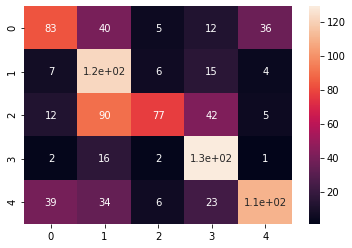

In [31]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_labels)
sns.heatmap(cm, annot=True)

In [34]:
# Performing data augmentation
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomRotation(0.3),
                                      layers.experimental.preprocessing.RandomContrast(0.1),
])

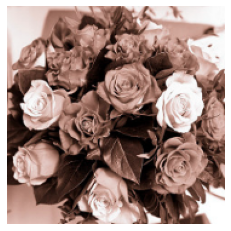

In [35]:
plt.axis('off')
plt.imshow(X[0])

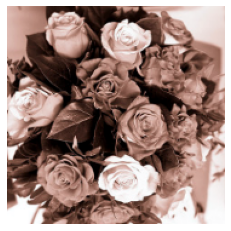

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [37]:
# Creating an augmented model 
model = Sequential([
                    data_augmentation,
                    layers.Conv2D(16,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(len(flowers_labels_dict.keys()),activation='softmax')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])



In [39]:
model.fit(X_train_scaled,Y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 83s 966ms/step - loss: 1.0632 - accuracy: 0.5618
Epoch 2/10
86/86 [==============================] - 83s 966ms/step - loss: 0.9765 - accuracy: 0.6079
Epoch 3/10
86/86 [==============================] - 83s 965ms/step - loss: 0.9232 - accuracy: 0.6428
Epoch 4/10
86/86 [==============================] - 83s 968ms/step - loss: 0.8538 - accuracy: 0.6773
Epoch 5/10
86/86 [==============================] - 83s 963ms/step - loss: 0.8166 - accuracy: 0.6842
Epoch 6/10
86/86 [==============================] - 83s 962ms/step - loss: 0.7872 - accuracy: 0.6984
Epoch 7/10
86/86 [==============================] - 83s 968ms/step - loss: 0.7631 - accuracy: 0.7126
Epoch 8/10
86/86 [==============================] - 84s 971ms/step - loss: 0.7376 - accuracy: 0.7158
Epoch 9/10
86/86 [==============================] - 83s 964ms/step - loss: 0.6870 - accuracy: 0.7358
Epoch 10/10
86/86 [==============================] - 83s 966ms/step - loss: 0.6589 - accura

In [40]:
model.evaluate(X_test_scaled,np.asarray(Y_test))


29/29 [==============================] - 8s 264ms/step - loss: 0.7515 - accuracy: 0.7081


[0.7514606714248657, 0.7080609798431396]

In [41]:
Y_pred2 = model.predict(X_test_scaled)

In [42]:
Y_pred_labels2 = [np.argmax(i) for i in Y_pred2]
print(classification_report(Y_test,Y_pred_labels2))

              precision    recall  f1-score   support

           0       0.71      0.45      0.55       176
           1       0.65      0.77      0.71       154
           2       0.78      0.78      0.78       226
           3       0.81      0.83      0.82       150
           4       0.62      0.71      0.66       212

    accuracy                           0.71       918
   macro avg       0.71      0.71      0.70       918
weighted avg       0.71      0.71      0.70       918



In [43]:
print(classification_report(Y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52       176
           1       0.40      0.79      0.54       154
           2       0.80      0.34      0.48       226
           3       0.58      0.86      0.70       150
           4       0.71      0.52      0.60       212

    accuracy                           0.57       918
   macro avg       0.62      0.60      0.57       918
weighted avg       0.63      0.57      0.56       918



Text(0.5, 1.0, 'Without data augmentation')

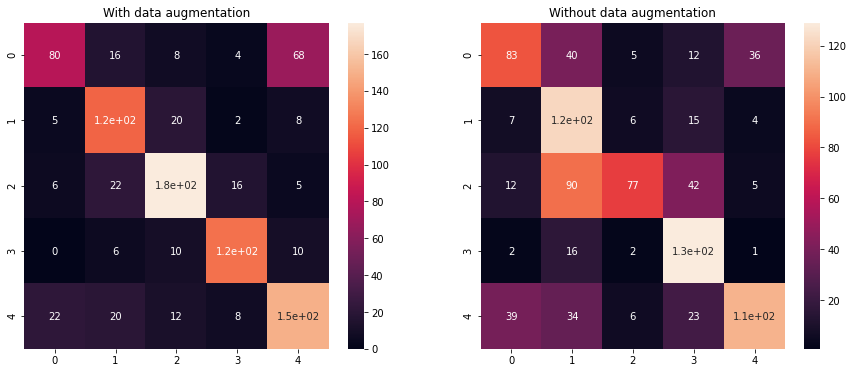

In [55]:
cm2 = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_labels2)

plt.figure(figsize=(15,6))

plt.subplot(121),
sns.heatmap(cm2, annot=True)
plt.title("With data augmentation")

plt.subplot(122),
sns.heatmap(cm, annot=True)
plt.title("Without data augmentation")
